#Implemnetation of Machine Learning Algorithms on Pattern Recognition Dataset.
###Objective:
The objective of this project is to find the most suitable machine learning algorithm that can be used in Pattern Recognition.
###Dataset:
The dataset consists of 75 speakers both male and female. Each speaker gave four input samples. The feature of these datas were extracted using MFCC and Viterbi Algorithm was used for pattern recognition.

In [1]:
#import Modules
import sys
print('Python: {}'.format(sys.version))
import scipy
print('scipy: {}'.format(scipy.__version__))
import numpy
import matplotlib
import pandas
import sklearn
print('All imported')

Python: 3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0]
scipy: 1.4.1
All imported


In [3]:
#Load Libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
print('Loaded')

Loaded


In [2]:
#load dataset
from google.colab import files 


uploaded = files.upload()

Saving Pattern Recognition Dataset.csv to Pattern Recognition Dataset.csv


In [4]:
#Displaying Dataset
import pandas as pd 
import io 

df = pd.read_csv(io.BytesIO(uploaded['Pattern Recognition Dataset.csv'])) 
print(df)


      Speakers  Total Samples  ...  RECOGNITION ACCURACY(%) Error
0    Speaker 1              4  ...                       75     Y
1    Speaker 2              4  ...                       80     Y
2    Speaker 3              4  ...                       95     Y
3    Speaker 4              4  ...                       75     Y
4    Speaker 5              4  ...                      100     N
..         ...            ...  ...                      ...   ...
70  Speaker 71              4  ...                       75     Y
71  Speaker 72              4  ...                      100     N
72  Speaker 73              4  ...                       80     Y
73  Speaker 74              4  ...                      100     N
74  Speaker 75              4  ...                      100     N

[75 rows x 9 columns]


In [5]:
print(df.shape)

(75, 9)


In [6]:
df.head()

,Speakers,Total Samples,Average Voice Duration(in seconds),GENDER,SOURCE FORMAT,MFCC NUMCEPS,TARGET RATE,RECOGNITION ACCURACY(%),Error
0,Speaker 1,4,5,M,wav,12,100000,75,Y
1,Speaker 2,4,5,M,wav,12,100000,80,Y
2,Speaker 3,4,5,M,wav,12,100000,95,Y
3,Speaker 4,4,5,M,wav,12,100000,75,Y
4,Speaker 5,4,5,M,wav,12,100000,100,N


In [12]:
df_gender = pd.get_dummies(df['GENDER'])

dataset = pd.concat([df, df_gender], axis=1)
print(dataset)

      Speakers  Total Samples  Average Voice Duration(in seconds)  ... Error  F  M
0    Speaker 1              4                                   5  ...     Y  0  1
1    Speaker 2              4                                   5  ...     Y  0  1
2    Speaker 3              4                                   5  ...     Y  0  1
3    Speaker 4              4                                   5  ...     Y  0  1
4    Speaker 5              4                                   5  ...     N  0  1
..         ...            ...                                 ...  ...   ... .. ..
70  Speaker 71              4                                   6  ...     Y  1  0
71  Speaker 72              4                                   5  ...     N  0  1
72  Speaker 73              4                                   6  ...     Y  0  1
73  Speaker 74              4                                   5  ...     N  0  1
74  Speaker 75              4                                   6  ...     N  0  1

[75

In [14]:
dataset.describe()

,Total Samples,Average Voice Duration(in seconds),MFCC NUMCEPS,TARGET RATE,RECOGNITION ACCURACY(%),F,M
count,75.0,75.000000,75.00000,75.000000,75.000000,75.000000,75.000000
mean,4.0,5.746667,17.76000,200000.000000,91.200000,0.466667,0.533333
std,0.0,1.040963,6.03557,82199.493653,10.712458,0.502247,0.502247
min,4.0,4.000000,12.00000,100000.000000,75.000000,0.000000,0.000000
25%,4.0,5.000000,12.00000,100000.000000,80.000000,0.000000,0.000000
50%,4.0,6.000000,12.00000,200000.000000,100.000000,0.000000,1.000000
75%,4.0,6.500000,24.00000,300000.000000,100.000000,1.000000,1.000000
max,4.0,8.000000,24.00000,300000.000000,100.000000,1.000000,1.000000


In [15]:
print(dataset.groupby('Error').size())

Error
N    40
Y    35
dtype: int64


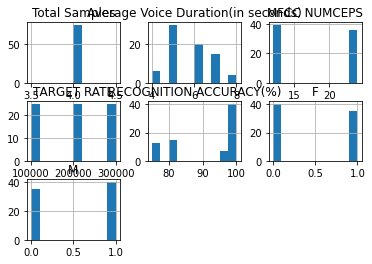

In [18]:
dataset.hist()
plt.show()


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 4.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 4.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 4.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:95: RuntimeWarning: invalid value encountered in true_divide
  adj = (locs - lim1[0]) / (lim1[1] - lim1[0])


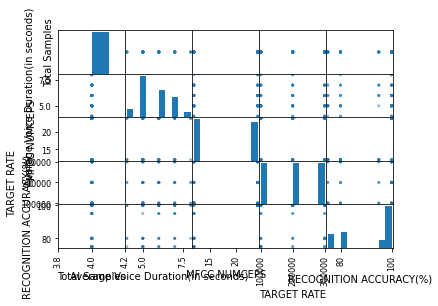

In [28]:
scatter_matrix(df)
plt.show()

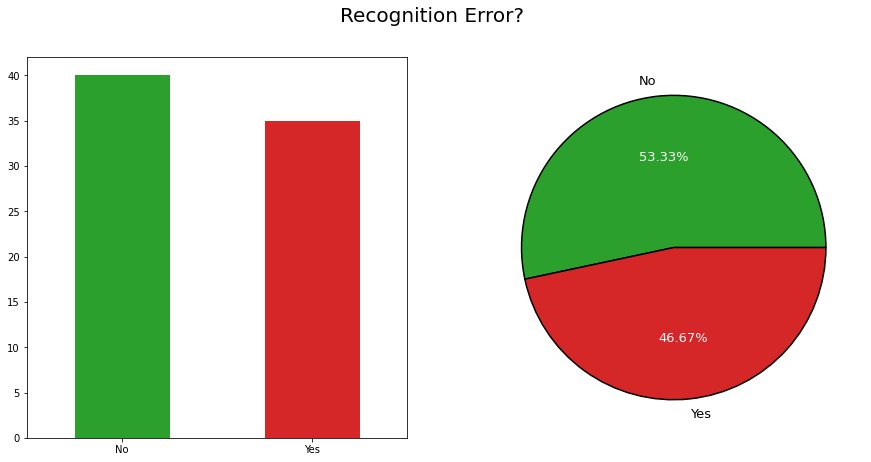

In [26]:
import seaborn as sns
f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Recognition Error?", fontsize = 20.)
_ = df.Error.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette()[2], sns.color_palette()[3])).set(xticklabels = ["No", "Yes"])
_ = df.Error.value_counts().plot.pie(labels = ("No", "Yes"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[2], sns.color_palette()[3]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#000000"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

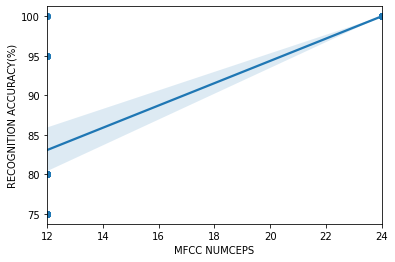

In [29]:
sns.regplot(x='MFCC NUMCEPS', y= 'RECOGNITION ACCURACY(%)', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


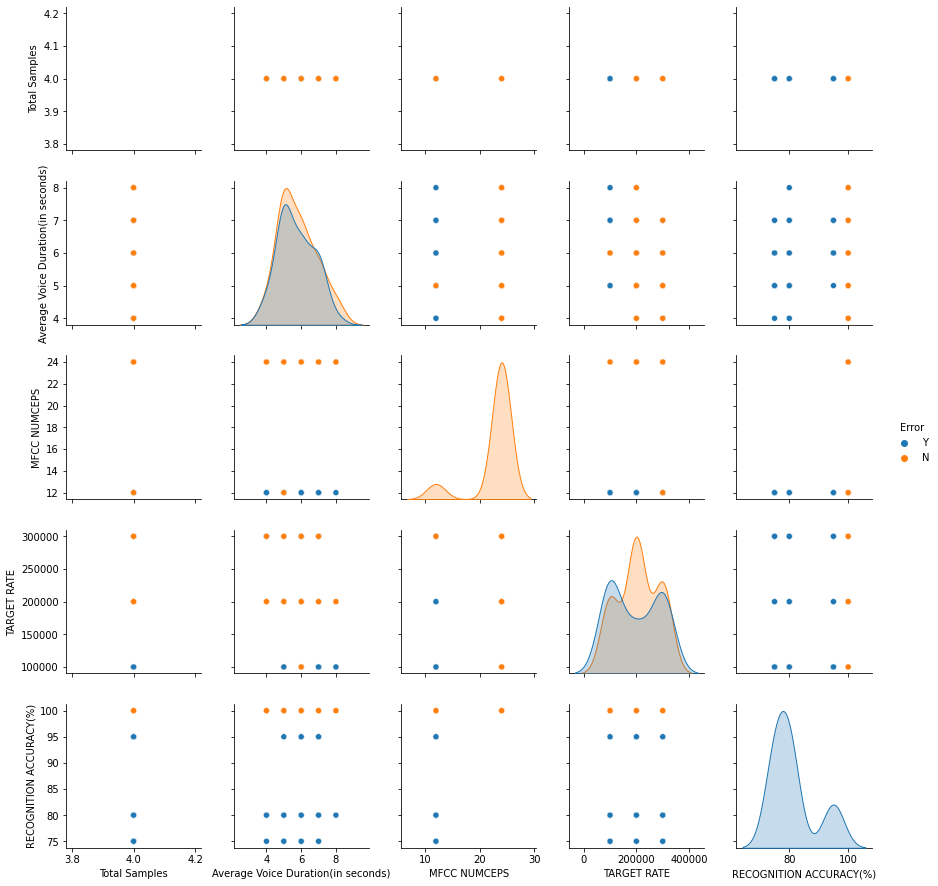

In [30]:
sns.pairplot(data=df,hue='Error')

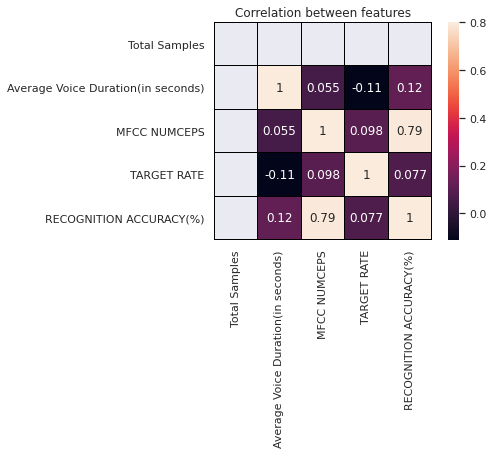

In [34]:
corr=df.corr()

sns.set_theme()

sns.heatmap(corr, vmax=.8, linewidths=0.1,
            square=True,annot=True,linecolor="black")
plt.title('Correlation between features');

In [45]:
df.head(0)

,Total Samples,Average Voice Duration(in seconds),GENDER,MFCC NUMCEPS,TARGET RATE,RECOGNITION ACCURACY(%),Error


In [46]:
dfnew = pd.get_dummies(df['Error'])

dataset = pd.concat([df, dfnew], axis=1)
print(dataset)

    Total Samples  Average Voice Duration(in seconds) GENDER  ...  Error  N  Y
0               4                                   5      M  ...      Y  0  1
1               4                                   5      M  ...      Y  0  1
2               4                                   5      M  ...      Y  0  1
3               4                                   5      M  ...      Y  0  1
4               4                                   5      M  ...      N  1  0
..            ...                                 ...    ...  ...    ... .. ..
70              4                                   6      F  ...      Y  0  1
71              4                                   5      M  ...      N  1  0
72              4                                   6      M  ...      Y  0  1
73              4                                   5      M  ...      N  1  0
74              4                                   6      M  ...      N  1  0

[75 rows x 9 columns]


In [50]:
dataset.head()

,Total Samples,Average Voice Duration(in seconds),MFCC NUMCEPS,TARGET RATE,RECOGNITION ACCURACY(%),N,Y
0,4,5,12,100000,75,0,1
1,4,5,12,100000,80,0,1
2,4,5,12,100000,95,0,1
3,4,5,12,100000,75,0,1
4,4,5,12,100000,100,1,0


In [51]:
#training the model
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 6
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = seed)


In [52]:
seed = 6
scoring = 'accuracy'

In [53]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
#evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=seed)
  cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.533333 (0.145297)
LDA: 0.600000 (0.152753)
KNN: 0.600000 (0.133333)
CART: 0.566667 (0.152753)
NB: 0.583333 (0.134371)
SVM: 0.550000 (0.130171)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

**KNN** and **LDA** gives the best accuracy in this pattern recognition dataset.